In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10,6)

iris = datasets.load_iris()

Populating the interactive namespace from numpy and matplotlib


In [2]:
X  = iris.data
y= iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris_df = pd.DataFrame(X,columns=iris.feature_names)

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


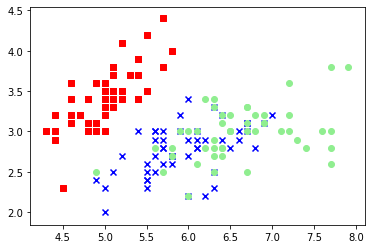

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
markers = ('s','x','o')
colors = ('red','blue','lightgreen')
cmap = ListedColormap(colors[:len(np.unicode(y_test))])
for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],
                c=cmap(idx),marker=markers[idx],label=cl)

In [8]:
class knn:
    def __init__(self,X,y):
        self.Xtr = X
        self.ytr=y
    def predict(self,X):
        self.num_test = X.shape[0]
        self.Ypredict = np.zeros(self.num_test, dtype = self.ytr.dtype)
        for i in range(self.num_test):
            L1_dist = np.sum(np.abs(self.Xtr- X[i,:]),axis=1)
            min_index = np.argmin(L1_dist)
            self.Ypredict[i] = self.ytr[min_index]
        return self.Ypredict
    def accuracy(self):
        return np.sum(self.Ypredict==y_test)/self.num_test
  

In [9]:
k= knn(X_train_sc,y_train)

In [10]:
k.predict(X_test_sc)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [11]:
k.accuracy()

0.9333333333333333